In [37]:
import pandas as pd
import pandas as pd
# !pip install datasets
from datasets import load_dataset

In [47]:
df = pd.read_json("hf://datasets/yhavinga/open_subtitles_en_nl/train.jsonl.gz", lines=True)

In [48]:
df = df[['translation']].sample(frac=0.05, random_state=11).reset_index(drop=True)
df['en'] = df['translation'].apply(lambda x: x['en'])

In [49]:
df = df.drop(columns=['translation'])
df

,en
0,I've been in hiding ever since. Watching. Wait...
1,It's kind of hard to buy that Lindsey would co...
2,It's a plan.
3,What?
4,Is my dad... is he back on the island?
...,...
152657,"Sorry, Clark, but you're dead wrong."
152658,"Anyway, he said that he dropped his wallet in ..."
152659,"In fact, except for the actions of a few of yo..."
152660,It changes everything.


<Axes: >

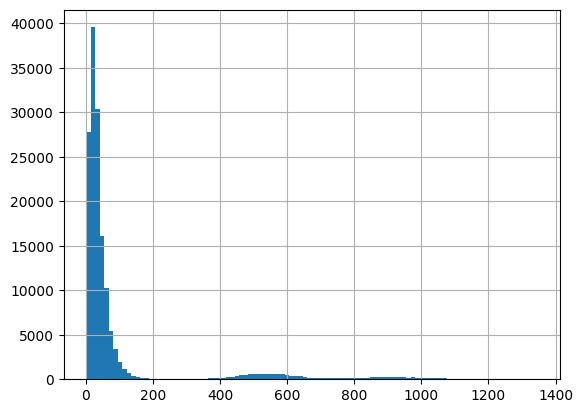

In [50]:
df['en_char'] = df['en'].apply(lambda x: len(x))
df['en_char'].hist(bins=100)

In [51]:
df = df[df['en_char'] < 150]
df = df[df['en_char'] > 10].reset_index(drop=True)
df

,en,en_char
0,I've been in hiding ever since. Watching. Wait...,104
1,It's kind of hard to buy that Lindsey would co...,134
2,It's a plan.,12
3,Is my dad... is he back on the island?,38
4,I need more mullins.,20
...,...,...
120902,"Well, why don't you give him a call?",36
120903,"Sorry, Clark, but you're dead wrong.",36
120904,"Anyway, he said that he dropped his wallet in ...",73
120905,It changes everything.,22


In [52]:
df


,en,en_char
0,I've been in hiding ever since. Watching. Wait...,104
1,It's kind of hard to buy that Lindsey would co...,134
2,It's a plan.,12
3,Is my dad... is he back on the island?,38
4,I need more mullins.,20
...,...,...
120902,"Well, why don't you give him a call?",36
120903,"Sorry, Clark, but you're dead wrong.",36
120904,"Anyway, he said that he dropped his wallet in ...",73
120905,It changes everything.,22


In [53]:
with open("train_120k", "w") as f:
    f.write("\n".join(df['en'].tolist()))

In [22]:
# !python train.py \
# --data data/en-fr/prepared \
# --source-lang en \
# --target-lang fr \
# --save-dir en-fr/checkpoints/ \
# --log-file logs/en-fr_tiny.log \
# --batch-size 256 \
# --lr 0.0012 \
# --patience 5

In [9]:
with open('en-fr/raw/train.en', 'r') as f:
    en = f.readlines()
df_ori = pd.DataFrame(en, columns=['en'])
df_ori['en_len'] = df_ori['en'].apply(lambda x: len(x.split()))
df_ori['en_char'] = df_ori['en'].apply(lambda x: len(x))

In [10]:
df_ori

,en,en_len,en_char
0,We need everything.\n,3,20
1,It's a small library.\n,4,22
2,Girls think much of fashion.\n,5,29
3,Snitches get stitches.\n,3,23
4,Spare me the details.\n,4,22
...,...,...,...
9995,We chose a hotel near the subway.\n,7,34
9996,The dog is sleeping at the foot of the bed.\n,10,44
9997,Tom came up with an ingenious idea.\n,7,36
9998,The critics shot us down.\n,5,26


<Axes: >

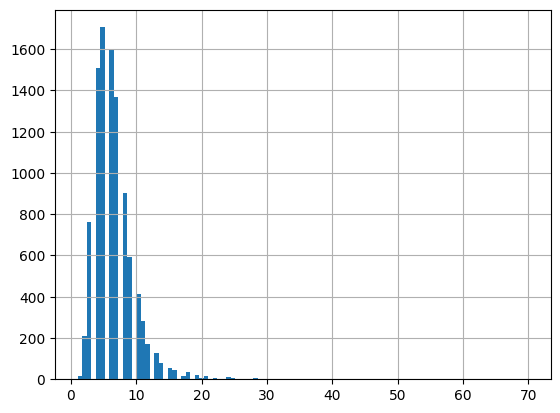

In [11]:
df_ori['en_len'].hist(bins=100)

<Axes: >

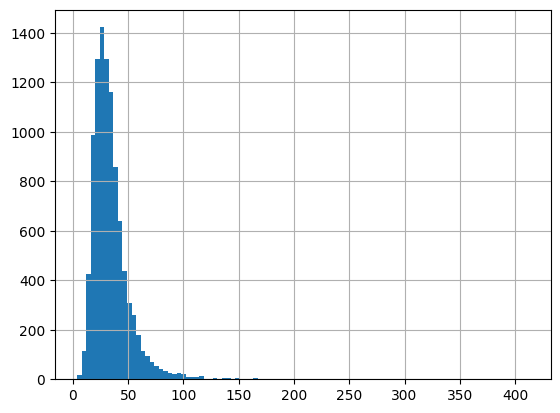

In [12]:
df_ori['en_char'].hist(bins=100)

In [25]:
!bash scripts/preprocess_data.sh \
en-fr/raw en fr
# add an argument log_file in preprocess.py

training truecase model for en
preprocessing train split for language en...
preprocessing tiny_train split for language en...
preprocessing test split for language en...
preprocessing valid split for language en...
training truecase model for fr
preprocessing train split for language fr...
preprocessing tiny_train split for language fr...
preprocessing test split for language fr...
preprocessing valid split for language fr...
preparing data for model training...
[2024-11-03 12:16:01] COMMAND: /Users/yeyang/Desktop/UZH/ATMT/ass/fr-en/atmt_2024/scripts/../preprocess.py --source-lang en --target-lang fr --dest-dir en-fr/raw/../prepared --train-prefix en-fr/raw/../preprocessed/train --valid-prefix en-fr/raw/../preprocessed/valid --test-prefix en-fr/raw/../preprocessed/test --tiny-train-prefix en-fr/raw/../preprocessed/tiny_train --threshold-src 1 --threshold-tgt 1 --num-words-src 4000 --num-words-tgt 4000
[2024-11-03 12:16:01] Arguments: {'source_lang': 'en', 'target_lang': 'fr', 'train_pr

In [57]:
!python translate_fr.py \
    --data en-fr/prepared/ \
    --dicts en-fr/prepared/ \
    --checkpoint-path en-fr/checkpoints/checkpoint_best.pt \
    --output en-fr/ \
    --batch-size 256
    # added an argument log_file in translate.py

[2024-11-03 12:32:08] COMMAND: translate_fr.py --data en-fr/prepared/ --dicts en-fr/prepared/ --checkpoint-path en-fr/checkpoints/checkpoint_best.pt --output en-fr/
[2024-11-03 12:32:08] Arguments: {'cuda': False, 'data': 'en-fr/prepared/', 'source_lang': 'en', 'target_lang': 'fr', 'max_tokens': None, 'batch_size': 1, 'train_on_tiny': False, 'arch': 'lstm', 'max_epoch': 10000, 'clip_norm': 4.0, 'lr': 0.0012, 'patience': 5, 'log_file': 'logs/translate.log', 'save_dir': 'en-fr/checkpoints/', 'restore_file': 'checkpoint_last.pt', 'save_interval': 1, 'no_save': False, 'epoch_checkpoints': False, 'encoder_embed_dim': 64, 'encoder_embed_path': None, 'encoder_hidden_size': 64, 'encoder_num_layers': 1, 'encoder_bidirectional': 'True', 'encoder_dropout_in': 0.25, 'encoder_dropout_out': 0.25, 'decoder_embed_dim': 64, 'decoder_embed_path': None, 'decoder_hidden_size': 128, 'decoder_num_layers': 1, 'decoder_dropout_in': 0.25, 'decoder_dropout_out': 0.25, 'decoder_use_attention': 'True', 'decoder_u